<a href="https://colab.research.google.com/github/TapanManu/Pytorch-Repo/blob/master/CIFAR-pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
from torchvision.datasets import CIFAR10

In [0]:
#download datasets from CIFAR10
dataset=CIFAR10(root="data/",download=True)

0it [00:00, ?it/s]

170500096it [00:02, 69291231.77it/s]                               


In [0]:
len(dataset)

50000

In [0]:
#download  datasets from CIFAR10 which has not been trained
test_dataset=CIFAR10(root="data/",train=False)
len(test_dataset)

10000

In [0]:
import matplotlib.pyplot as plt
# to show the pictures within the notebook
%matplotlib inline

In [0]:
print(dataset[0])

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F310A875BA8>, 6)


label: 1


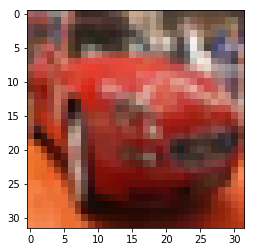

In [0]:
image,label=dataset[5]
plt.imshow(image)
print("label:",label)

In [0]:
import torchvision.transforms as transforms
import numpy as np

In [0]:
dataset=CIFAR10(root="data/",train=True,transform=transforms.ToTensor())
image,label=dataset[0]
print(image.shape,label)

torch.Size([3, 32, 32]) 6


In [0]:
print(image[:,10:15,10:15])
print(torch.max(image),torch.min(image))

tensor([[[0.3137, 0.3804, 0.3529, 0.3843, 0.5373],
         [0.4353, 0.5725, 0.5333, 0.6392, 0.6627],
         [0.5412, 0.8353, 0.6980, 0.7490, 0.8275],
         [0.6471, 0.8980, 0.7176, 0.7490, 0.9373],
         [0.7529, 0.7255, 0.5686, 0.7961, 0.8745]],

        [[0.1569, 0.2078, 0.1765, 0.2196, 0.3569],
         [0.2353, 0.3373, 0.3059, 0.4549, 0.4510],
         [0.3098, 0.5882, 0.4824, 0.5882, 0.6627],
         [0.4157, 0.6902, 0.5373, 0.6196, 0.8471],
         [0.5961, 0.5804, 0.3961, 0.6353, 0.7843]],

        [[0.0510, 0.0667, 0.0667, 0.1176, 0.2235],
         [0.0549, 0.0863, 0.0902, 0.3020, 0.2706],
         [0.0745, 0.2314, 0.1608, 0.3843, 0.4784],
         [0.1961, 0.3608, 0.2235, 0.4039, 0.6902],
         [0.4431, 0.4196, 0.2000, 0.4745, 0.6667]]])
tensor(1.) tensor(0.)


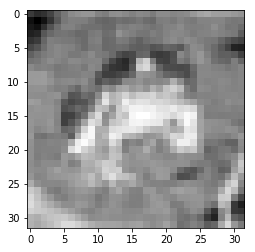

In [0]:
plt.imshow(image[0],cmap="gray")

In [0]:
def seperate_indices(n,val_pct):
  n_val=int(n*val_pct)
  idxs=np.random.permutation(n)
  return idxs[n_val:],idxs[:n_val]

In [0]:
train_indices,val_indices=seperate_indices(len(dataset),val_pct=0.2)
print(len(train_indices),len(val_indices))

40000 10000


In [0]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader
import torch.nn as nn

In [0]:
train_sampler=SubsetRandomSampler(train_indices)
train_loader=DataLoader(dataset,100,train_sampler)
val_sampler=SubsetRandomSampler(val_indices)
val_loader=DataLoader(dataset,100,val_sampler)

In [0]:
model=nn.Linear(32*32*3,10)
print(model.weight.shape)
print(model.bias.shape)
print(model.weight)
print(model.bias)

torch.Size([10, 3072])
torch.Size([10])
Parameter containing:
tensor([[ 8.4234e-03,  1.0363e-02,  1.1638e-02,  ...,  4.1362e-03,
         -1.3476e-02,  1.1923e-02],
        [ 5.6978e-05, -1.0583e-02,  7.9200e-03,  ..., -5.8348e-03,
         -2.4771e-03,  6.8724e-03],
        [-4.5802e-03, -1.2151e-02,  1.1599e-03,  ...,  3.8237e-04,
         -1.3881e-02,  5.9072e-03],
        ...,
        [ 1.0638e-02,  2.0621e-04, -9.2327e-03,  ...,  1.5053e-02,
         -1.6251e-02, -9.1603e-03],
        [-1.7120e-02, -1.4528e-02, -6.8906e-03,  ...,  7.5107e-04,
          4.8831e-03,  1.7157e-02],
        [-9.2682e-03,  4.9069e-03,  6.3059e-03,  ...,  7.5082e-03,
          1.6533e-02,  9.3378e-03]], requires_grad=True)
Parameter containing:
tensor([ 0.0099,  0.0128,  0.0001, -0.0158,  0.0012, -0.0075,  0.0115, -0.0032,
        -0.0076, -0.0060], requires_grad=True)


In [0]:
class CIFARModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(32*32*3,10)
  def forward(self,xb):
    xb=xb.reshape(-1,3072)
    out=self.linear(xb)
    return out
model=CIFARModel()
    

In [0]:
for images,labels in train_loader:
  outputs=model(images)
  break

In [0]:
print("outputs.shape:",outputs.shape)
print(labels.shape)
print(label)

outputs.shape: torch.Size([100, 10])
torch.Size([100])
6


In [0]:
import torch.nn.functional as F
probs=F.softmax(outputs,dim=1)
print("sum:",torch.sum(probs[0]).item())

sum: 1.0


In [0]:
max_probs,preds=torch.max(probs,dim=1)
print(preds)
print(max_probs)

tensor([9, 1, 1, 1, 9, 9, 9, 1, 9, 1, 9, 1, 6, 9, 9, 9, 9, 1, 9, 1, 9, 9, 9, 9,
        1, 9, 9, 1, 1, 1, 1, 1, 1, 9, 9, 1, 9, 9, 1, 6, 6, 1, 1, 9, 3, 9, 6, 9,
        9, 9, 9, 6, 9, 1, 9, 9, 1, 9, 1, 9, 1, 4, 1, 9, 9, 1, 1, 1, 6, 9, 1, 3,
        1, 9, 6, 1, 9, 1, 1, 1, 9, 1, 9, 1, 9, 9, 9, 1, 1, 9, 1, 9, 9, 1, 6, 1,
        1, 9, 9, 9])
tensor([0.1524, 0.1620, 0.1463, 0.1845, 0.1323, 0.1489, 0.1204, 0.1517, 0.1266,
        0.1747, 0.1327, 0.1535, 0.1429, 0.1474, 0.1442, 0.1481, 0.1661, 0.1608,
        0.1569, 0.1304, 0.1513, 0.1630, 0.1554, 0.1363, 0.1442, 0.1420, 0.1349,
        0.1477, 0.1503, 0.1936, 0.1234, 0.1689, 0.1623, 0.1496, 0.1530, 0.1742,
        0.1392, 0.1676, 0.1246, 0.1388, 0.1464, 0.1425, 0.1669, 0.1744, 0.1126,
        0.1338, 0.1200, 0.1232, 0.1679, 0.1279, 0.1489, 0.1328, 0.1622, 0.1609,
        0.1525, 0.1632, 0.1425, 0.1613, 0.1418, 0.1477, 0.1723, 0.1153, 0.1751,
        0.1451, 0.1184, 0.1460, 0.1480, 0.1652, 0.1429, 0.1641, 0.1368, 0.1309,
        0.1514, 0.1

In [0]:
print(labels)

tensor([6, 0, 1, 1, 7, 9, 6, 8, 4, 9, 6, 2, 7, 9, 5, 2, 2, 8, 7, 6, 8, 1, 4, 2,
        8, 7, 2, 0, 1, 9, 7, 8, 3, 8, 4, 1, 7, 1, 1, 7, 5, 5, 9, 9, 0, 4, 0, 3,
        8, 3, 8, 4, 9, 9, 2, 7, 1, 9, 4, 6, 4, 4, 0, 2, 2, 4, 8, 2, 0, 3, 1, 4,
        2, 6, 5, 1, 7, 1, 3, 0, 6, 2, 4, 8, 3, 5, 0, 1, 1, 5, 8, 6, 4, 6, 4, 9,
        8, 3, 6, 6])


In [0]:
loss_fn=F.cross_entropy
loss=loss_fn(outputs,labels)
print(loss)

tensor(2.3003, grad_fn=<NllLossBackward>)


In [0]:
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [0]:
def loss_batch(model,loss_fn,xb,yb,opt=None,metric=None):
  preds=model(xb)
  loss=loss_fn(preds,yb)
  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()
  metric_result=None
  if metric is not None:
    metric_result=metric(preds,yb)
    
  return loss.item(),len(xb),metric_result  
    

In [0]:
def evaluate(model,loss_fn,valid_dl,metric=None):
  with torch.no_grad():
    #pass each batch through the model
    results=[loss_batch(model,loss_fn,xb,yb,metric=metric) for xb,yb in valid_dl]
    #seperate losses,counts and metrics
    losses,nums,metrics=zip(*results)
    #total size of datasets
    total=np.sum(nums)
    
    #avg.loss across batches
    avg_loss=np.sum(np.multiply(losses,nums))/total
    avg_metric=None
    if metric is not None:
      #average of metric across batches
      avg_metric=np.sum(np.multiply(metrics,nums))/total
  return avg_loss,total,avg_metric


In [0]:
def accuracy(outputs,labels):
  _,preds=torch.max(outputs,dim=1)
  return torch.sum(preds==labels).item()/len(preds)

In [0]:
val_loss,total,val_acc=evaluate(model,loss_fn,val_loader,metric=accuracy)
print("loss:{:.4f},accuracy:{:.4f}".format(val_loss,val_acc))

loss:2.3344,accuracy:0.0851


In [0]:
def fit(epochs,model,loss_fn,opt,train_dl,valid_dl,metric=None):
  for epoch in range(epochs):
    #training
    for xb,yb in train_dl:
      loss,_,_=loss_batch(model,loss_fn,xb,yb,opt)
    #evaluation
    result=evaluate(model,loss_fn,valid_dl,metric)
    val_loss,total,val_metric=result
    #print progress
    if metric is None:
      print('Epoch[{}/{}],loss:{:.4f}'.format(epoch+1,epochs,val_loss))
    else:
      print('Epoch[{}/{}],loss:{:.4f},{}:{:.4f}'.format(epoch+1,epochs,val_loss,metric.__name__,val_metric))

In [0]:
model=CIFARModel()
optimizer=torch.optim.SGD(model.parameters(),lr=1e-2)

In [0]:
fit(15,model,F.cross_entropy,optimizer,train_loader,val_loader,accuracy)

Epoch[1/15],loss:1.8607,accuracy:0.3623
Epoch[2/15],loss:1.8313,accuracy:0.3657
Epoch[3/15],loss:1.8105,accuracy:0.3702
Epoch[4/15],loss:1.7817,accuracy:0.3846
Epoch[5/15],loss:1.7784,accuracy:0.3792
Epoch[6/15],loss:1.7611,accuracy:0.3930
Epoch[7/15],loss:1.7585,accuracy:0.3892
Epoch[8/15],loss:1.7361,accuracy:0.4054
Epoch[9/15],loss:1.7480,accuracy:0.3993
Epoch[10/15],loss:1.7697,accuracy:0.3865
Epoch[11/15],loss:1.7321,accuracy:0.4004
Epoch[12/15],loss:1.7398,accuracy:0.3877
Epoch[13/15],loss:1.7275,accuracy:0.4034
Epoch[14/15],loss:1.7139,accuracy:0.4121
Epoch[15/15],loss:1.7191,accuracy:0.4101
